In [1]:
import pandas as pd
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Assuming the uploaded file is named 'dataset.csv'
# Read dataset into pandas dataframe
dataset = pd.read_csv("cyberbullying_tweets.csv")

# Display the first few rows of the dataset
print("Dataset:")
print(dataset.head())

Saving cyberbullying_tweets.csv to cyberbullying_tweets.csv
Dataset:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


In [2]:
import pandas as pd
import string
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Assuming dataset is already loaded into a pandas DataFrame named 'dataset'
# and the column containing text data is named 'tweet'

# Define preprocessing functions
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Expand contractions
    contractions = {
        "what's": "what is",
        "can't": "can not"
        # Add more contractions as needed
    }
    for key, value in contractions.items():
        text = text.replace(key, value)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text

def tokenize_and_stem(text):
    # Tokenization using Regex Tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # Stemming using Porter Stemmer
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    return stemmed_tokens

def remove_stopwords(tokens):
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    return filtered_tokens

def preprocess_pipeline(text):
    text = preprocess_text(text)
    tokens = tokenize_and_stem(text)
    tokens = remove_stopwords(tokens)
    return tokens

# Apply preprocessing to the dataset
# Assuming the column to preprocess is named 'tweet_text'
dataset['processed_tweet'] = dataset['tweet_text'].apply(preprocess_pipeline)

# Display the first few rows of the processed dataset
print("Processed Dataset:")
print(dataset.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Processed Dataset:
                                          tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                     processed_tweet  
0       [word, katandandr, food, wa, crapilici, mkr]  
1  [whi, aussietv, white, mkr, theblock, imaceleb...  
2  [xochitlsuckkk, classi, whore, red, velvet, cu...  
3  [jasongio, meh, p, thank, head, concern, anoth...  
4  [rudhoeenglish, thi, isi, account, pretend, ku...  


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag of Words model
def bag_of_words(corpus):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X, vectorizer

# Apply Bag of Words to the processed tweets
bow_matrix, bow_vectorizer = bag_of_words(dataset['processed_tweet'].apply(lambda x: ' '.join(x)))

# Display Bag of Words features
print("Bag of Words Feature Matrix:")
print(bow_matrix.toarray())

Bag of Words Feature Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF model
def tf_idf(corpus):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X, vectorizer

# Apply TF-IDF to the processed tweets
tfidf_matrix, tfidf_vectorizer = tf_idf(dataset['processed_tweet'].apply(lambda x: ' '.join(x)))

# Display TF-IDF features
print("TF-IDF Feature Matrix:")
print(tfidf_matrix.toarray())


TF-IDF Feature Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec model
def word2vec(corpus, size=100, window=5, min_count=1, workers=4):
    model = Word2Vec(sentences=corpus, vector_size=size, window=window, min_count=min_count, workers=workers)
    return model

# Apply Word2Vec to the processed tweets
w2v_model = word2vec(dataset['processed_tweet'])

# Generate feature vectors for each tweet by averaging the word vectors
def get_feature_vector(tokens, model, size):
    vec = np.zeros(size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    if count > 0:
        vec /= count
    return vec

# Apply feature extraction to the dataset
dataset['w2v_vector'] = dataset['processed_tweet'].apply(lambda x: get_feature_vector(x, w2v_model, 100))

# Display Word2Vec features
print("Word2Vec Feature Vectors:")
print(dataset['w2v_vector'].head())

Word2Vec Feature Vectors:
0    [-0.2352982668671757, 0.012146615035211047, -0...
1    [-0.13174541145175075, 0.04489239590475336, -0...
2    [-0.20123398350551724, 0.05162283258202175, -0...
3    [-0.234137696120888, 0.19526739064604043, -0.2...
4    [-0.2104846691712737, -0.09275418277829886, -0...
Name: w2v_vector, dtype: object


In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_bow_train, X_bow_test, y_train, y_test = train_test_split(bow_matrix, dataset['cyberbullying_type'], test_size=0.2, random_state=42)
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(tfidf_matrix, dataset['cyberbullying_type'], test_size=0.2, random_state=42)
X_w2v_train, X_w2v_test, y_train, y_test = train_test_split(np.stack(dataset['w2v_vector']), dataset['cyberbullying_type'], test_size=0.2, random_state=42)

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train and evaluate SVM using Bag of Words features
svm_bow = SVC(kernel='linear')
svm_bow.fit(X_bow_train, y_train)
y_bow_pred = svm_bow.predict(X_bow_test)
print("SVM with Bag of Words")
print("Accuracy:", accuracy_score(y_test, y_bow_pred))
print(classification_report(y_test, y_bow_pred))

# Train and evaluate SVM using TF-IDF features
svm_tfidf = SVC(kernel='linear')
svm_tfidf.fit(X_tfidf_train, y_train)
y_tfidf_pred = svm_tfidf.predict(X_tfidf_test)
print("SVM with TF-IDF")
print("Accuracy:", accuracy_score(y_test, y_tfidf_pred))
print(classification_report(y_test, y_tfidf_pred))

# Train and evaluate SVM using Word2Vec features
svm_w2v = SVC(kernel='linear')
svm_w2v.fit(X_w2v_train, y_train)
y_w2v_pred = svm_w2v.predict(X_w2v_test)
print("SVM with Word2Vec")
print("Accuracy:", accuracy_score(y_test, y_w2v_pred))
print(classification_report(y_test, y_w2v_pred))

SVM with Bag of Words
Accuracy: 0.8109864765698711
                     precision    recall  f1-score   support

                age       0.96      0.97      0.96      1603
          ethnicity       0.98      0.97      0.98      1603
             gender       0.86      0.85      0.85      1531
  not_cyberbullying       0.56      0.53      0.54      1624
other_cyberbullying       0.58      0.64      0.61      1612
           religion       0.96      0.92      0.94      1566

           accuracy                           0.81      9539
          macro avg       0.82      0.81      0.81      9539
       weighted avg       0.81      0.81      0.81      9539

SVM with TF-IDF
Accuracy: 0.8321627004927141
                     precision    recall  f1-score   support

                age       0.96      0.97      0.96      1603
          ethnicity       0.99      0.97      0.98      1603
             gender       0.90      0.85      0.87      1531
  not_cyberbullying       0.61      0.56      

In [10]:
from sklearn.linear_model import LogisticRegression

# Train and evaluate Logistic Regression using Bag of Words features
lr_bow = LogisticRegression(max_iter=1000)
lr_bow.fit(X_bow_train, y_train)
y_bow_pred = lr_bow.predict(X_bow_test)
print("Logistic Regression with Bag of Words")
print("Accuracy:", accuracy_score(y_test, y_bow_pred))
print(classification_report(y_test, y_bow_pred))

# Train and evaluate Logistic Regression using TF-IDF features
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_tfidf_train, y_train)
y_tfidf_pred = lr_tfidf.predict(X_tfidf_test)
print("Logistic Regression with TF-IDF")
print("Accuracy:", accuracy_score(y_test, y_tfidf_pred))
print(classification_report(y_test, y_tfidf_pred))

# Train and evaluate Logistic Regression using Word2Vec features
lr_w2v = LogisticRegression(max_iter=1000)
lr_w2v.fit(X_w2v_train, y_train)
y_w2v_pred = lr_w2v.predict(X_w2v_test)
print("Logistic Regression with Word2Vec")
print("Accuracy:", accuracy_score(y_test, y_w2v_pred))
print(classification_report(y_test, y_w2v_pred))

Logistic Regression with Bag of Words
Accuracy: 0.8196875982807422
                     precision    recall  f1-score   support

                age       0.97      0.97      0.97      1603
          ethnicity       0.99      0.97      0.98      1603
             gender       0.88      0.84      0.86      1531
  not_cyberbullying       0.57      0.56      0.57      1624
other_cyberbullying       0.58      0.65      0.61      1612
           religion       0.96      0.94      0.95      1566

           accuracy                           0.82      9539
          macro avg       0.83      0.82      0.82      9539
       weighted avg       0.82      0.82      0.82      9539

Logistic Regression with TF-IDF
Accuracy: 0.8272355592829437
                     precision    recall  f1-score   support

                age       0.96      0.97      0.96      1603
          ethnicity       0.99      0.96      0.98      1603
             gender       0.91      0.83      0.87      1531
  not_cyberbul

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate Decision Tree using Bag of Words features
dt_bow = DecisionTreeClassifier()
dt_bow.fit(X_bow_train, y_train)
y_bow_pred = dt_bow.predict(X_bow_test)
print("Decision Tree with Bag of Words")
print("Accuracy:", accuracy_score(y_test, y_bow_pred))
print(classification_report(y_test, y_bow_pred))

# Train and evaluate Decision Tree using TF-IDF features
dt_tfidf = DecisionTreeClassifier()
dt_tfidf.fit(X_tfidf_train, y_train)
y_tfidf_pred = dt_tfidf.predict(X_tfidf_test)
print("Decision Tree with TF-IDF")
print("Accuracy:", accuracy_score(y_test, y_tfidf_pred))
print(classification_report(y_test, y_tfidf_pred))

# Train and evaluate Decision Tree using Word2Vec features
dt_w2v = DecisionTreeClassifier()
dt_w2v.fit(X_w2v_train, y_train)
y_w2v_pred = dt_w2v.predict(X_w2v_test)
print("Decision Tree with Word2Vec")
print("Accuracy:", accuracy_score(y_test, y_w2v_pred))
print(classification_report(y_test, y_w2v_pred))

Decision Tree with Bag of Words
Accuracy: 0.7865604361044135
                     precision    recall  f1-score   support

                age       0.97      0.96      0.96      1603
          ethnicity       0.98      0.97      0.98      1603
             gender       0.86      0.84      0.85      1531
  not_cyberbullying       0.49      0.50      0.50      1624
other_cyberbullying       0.51      0.53      0.52      1612
           religion       0.94      0.93      0.94      1566

           accuracy                           0.79      9539
          macro avg       0.79      0.79      0.79      9539
       weighted avg       0.79      0.79      0.79      9539

Decision Tree with TF-IDF
Accuracy: 0.7838347835202851
                     precision    recall  f1-score   support

                age       0.97      0.96      0.96      1603
          ethnicity       0.98      0.96      0.97      1603
             gender       0.86      0.84      0.85      1531
  not_cyberbullying       

Decision Tree with Bag of Words
Accuracy: 0.6194569661390082
                     precision    recall  f1-score   support

                age       0.98      0.92      0.95      1603
          ethnicity       1.00      0.63      0.78      1603
             gender       0.97      0.48      0.65      1531
  not_cyberbullying       0.48      0.03      0.06      1624
other_cyberbullying       0.31      0.99      0.48      1612
           religion       0.98      0.66      0.78      1566

           accuracy                           0.62      9539
          macro avg       0.79      0.62      0.62      9539
       weighted avg       0.78      0.62      0.61      9539



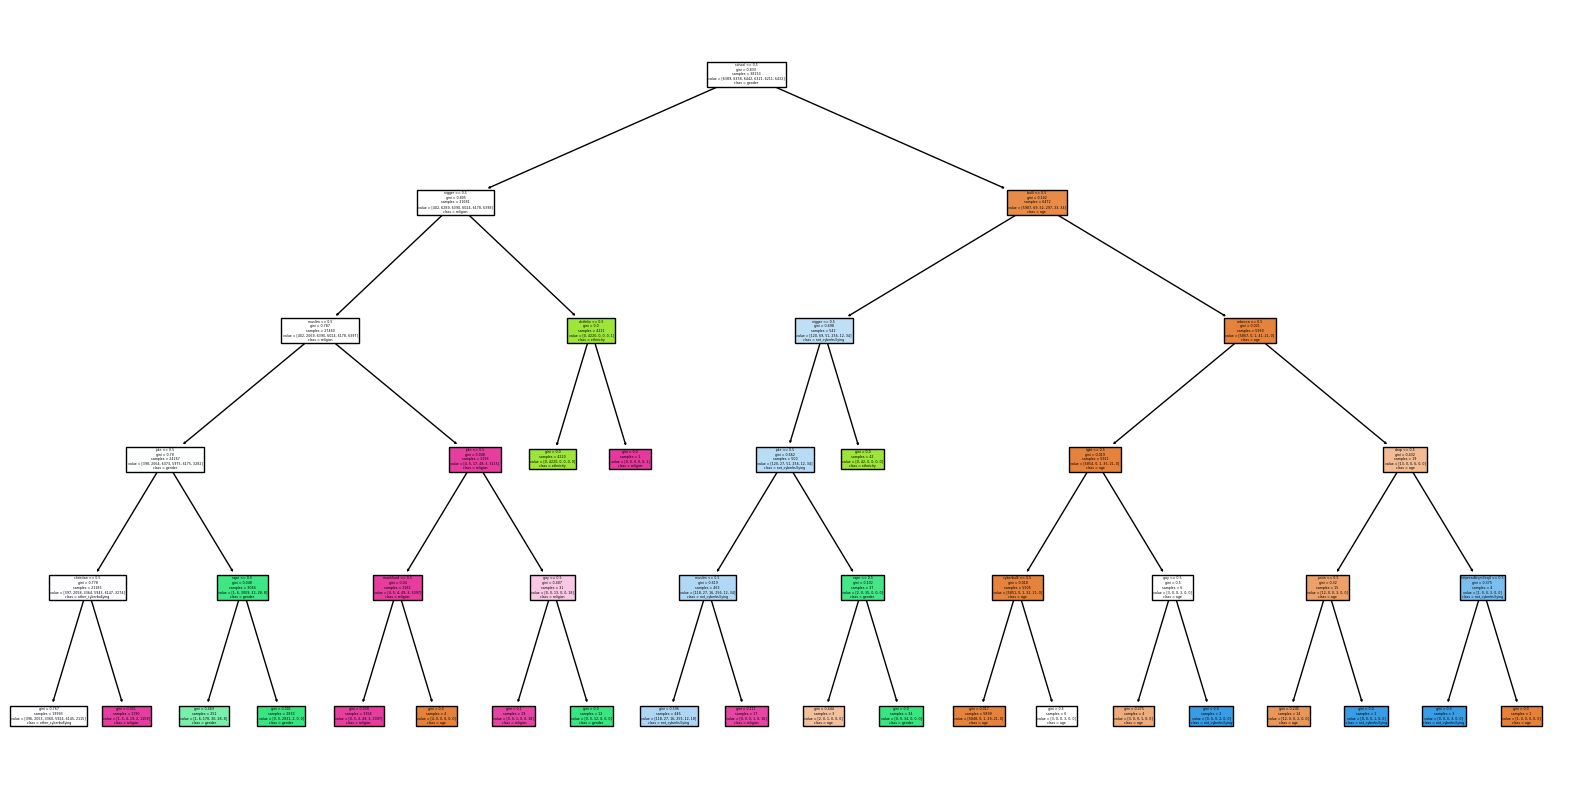

Decision Tree with TF-IDF
Accuracy: 0.6191424677639166
                     precision    recall  f1-score   support

                age       0.98      0.93      0.95      1603
          ethnicity       1.00      0.63      0.78      1603
             gender       0.97      0.48      0.65      1531
  not_cyberbullying       0.52      0.03      0.06      1624
other_cyberbullying       0.31      0.99      0.48      1612
           religion       0.97      0.65      0.78      1566

           accuracy                           0.62      9539
          macro avg       0.79      0.62      0.61      9539
       weighted avg       0.79      0.62      0.61      9539



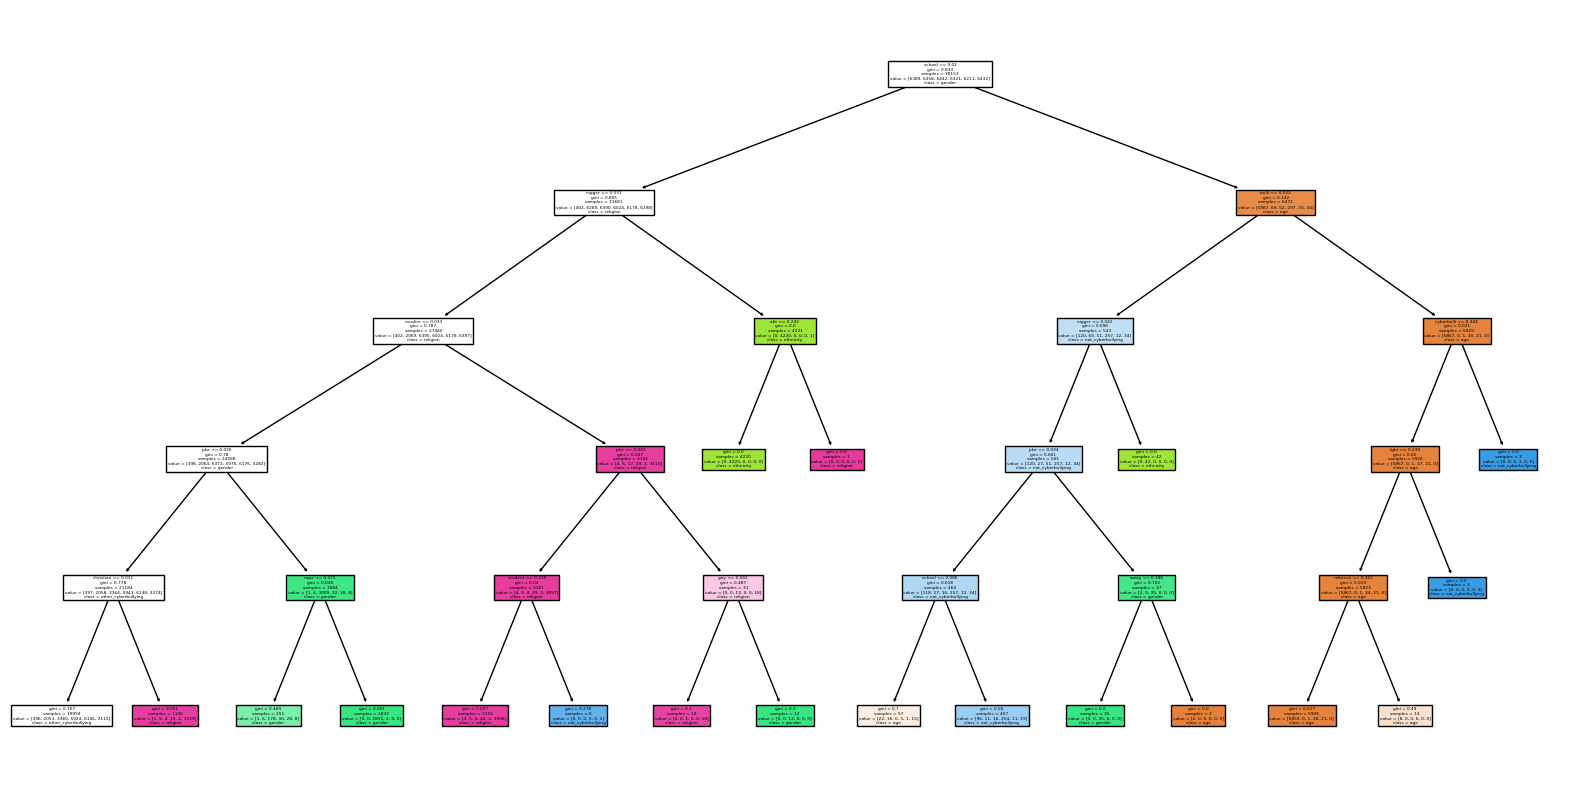

Decision Tree with Word2Vec
Accuracy: 0.6646398993605199
                     precision    recall  f1-score   support

                age       0.89      0.89      0.89      1603
          ethnicity       0.86      0.84      0.85      1603
             gender       0.68      0.72      0.70      1531
  not_cyberbullying       0.39      0.42      0.41      1624
other_cyberbullying       0.37      0.34      0.35      1612
           religion       0.80      0.78      0.79      1566

           accuracy                           0.66      9539
          macro avg       0.67      0.67      0.67      9539
       weighted avg       0.67      0.66      0.66      9539



In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Train and evaluate Decision Tree using Bag of Words features
dt_bow = DecisionTreeClassifier(max_depth=5)
dt_bow.fit(X_bow_train, y_train)
y_bow_pred = dt_bow.predict(X_bow_test)
print("Decision Tree with Bag of Words")
print("Accuracy:", accuracy_score(y_test, y_bow_pred))
print(classification_report(y_test, y_bow_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_bow, filled=True, feature_names=bow_vectorizer.get_feature_names_out(), class_names=dt_bow.classes_)
plt.show()

# Train and evaluate Decision Tree using TF-IDF features
dt_tfidf = DecisionTreeClassifier(max_depth=5)
dt_tfidf.fit(X_tfidf_train, y_train)
y_tfidf_pred = dt_tfidf.predict(X_tfidf_test)
print("Decision Tree with TF-IDF")
print("Accuracy:", accuracy_score(y_test, y_tfidf_pred))
print(classification_report(y_test, y_tfidf_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_tfidf, filled=True, feature_names=tfidf_vectorizer.get_feature_names_out(), class_names=dt_tfidf.classes_)
plt.show()

# Train and evaluate Decision Tree using Word2Vec features
dt_w2v = DecisionTreeClassifier()
dt_w2v.fit(X_w2v_train, y_train)
y_w2v_pred = dt_w2v.predict(X_w2v_test)
print("Decision Tree with Word2Vec")
print("Accuracy:", accuracy_score(y_test, y_w2v_pred))
print(classification_report(y_test, y_w2v_pred))

# No direct visualization for Word2Vec-based decision tree, as it operates on continuous vectors rather than discrete features.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train and evaluate Random Forest using Bag of Words features
rf_bow = RandomForestClassifier(n_estimators=20, random_state=42)
rf_bow.fit(X_bow_train, y_train)
y_bow_pred = rf_bow.predict(X_bow_test)
print("Random Forest with Bag of Words")
print("Accuracy:", accuracy_score(y_test, y_bow_pred))
print(classification_report(y_test, y_bow_pred))

# Train and evaluate Random Forest using TF-IDF features
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf.fit(X_tfidf_train, y_train)
y_tfidf_pred = rf_tfidf.predict(X_tfidf_test)
print("Random Forest with TF-IDF")
print("Accuracy:", accuracy_score(y_test, y_tfidf_pred))
print(classification_report(y_test, y_tfidf_pred))

# Train and evaluate Random Forest using Word2Vec features
rf_w2v = RandomForestClassifier(n_estimators=100, random_state=42)
rf_w2v.fit(X_w2v_train, y_train)
y_w2v_pred = rf_w2v.predict(X_w2v_test)
print("Random Forest with Word2Vec")
print("Accuracy:", accuracy_score(y_test, y_w2v_pred))
print(classification_report(y_test, y_w2v_pred))

Random Forest with Bag of Words
Accuracy: 0.8045916762763392
                     precision    recall  f1-score   support

                age       0.96      0.97      0.97      1603
          ethnicity       0.98      0.97      0.98      1603
             gender       0.86      0.84      0.85      1531
  not_cyberbullying       0.55      0.50      0.52      1624
other_cyberbullying       0.54      0.60      0.57      1612
           religion       0.95      0.95      0.95      1566

           accuracy                           0.80      9539
          macro avg       0.81      0.81      0.81      9539
       weighted avg       0.81      0.80      0.80      9539

Random Forest with TF-IDF
Accuracy: 0.8181151064052836
                     precision    recall  f1-score   support

                age       0.97      0.98      0.97      1603
          ethnicity       0.99      0.98      0.98      1603
             gender       0.88      0.84      0.86      1531
  not_cyberbullying       